In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'DejaVu Sans'

In [2]:
import FinanceDataReader as fdr
STOCK_CODE = '001750'

In [3]:
stock = fdr.DataReader(STOCK_CODE, '2020-02-01', '2021-02-01')

In [4]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-02-03,9440,9440,9030,9140,99485,-0.044932
2020-02-04,9140,9150,9020,9110,30886,-0.003282
2020-02-05,9200,9200,9000,9040,38531,-0.007684
2020-02-06,9140,9140,8760,8920,92807,-0.013274
2020-02-07,8940,8940,8750,8860,49339,-0.006726


In [5]:
stock.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-26,10100,10500,10100,10350,142671,0.024752
2021-01-27,10500,10550,10050,10100,145254,-0.024155
2021-01-28,9910,9910,9460,9530,201397,-0.056436
2021-01-29,9550,9600,9150,9260,140327,-0.028332
2021-02-01,9200,9480,9100,9410,72435,0.016199


In [6]:
stock.index

DatetimeIndex(['2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-10', '2020-02-11', '2020-02-12',
               '2020-02-13', '2020-02-14',
               ...
               '2021-01-19', '2021-01-20', '2021-01-21', '2021-01-22',
               '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
               '2021-01-29', '2021-02-01'],
              dtype='datetime64[ns]', name='Date', length=249, freq=None)

In [7]:
stock['Year'] = stock.index.year
stock['Month'] = stock.index.month
stock['Day'] = stock.index.day

Text(0, 0.5, 'price')

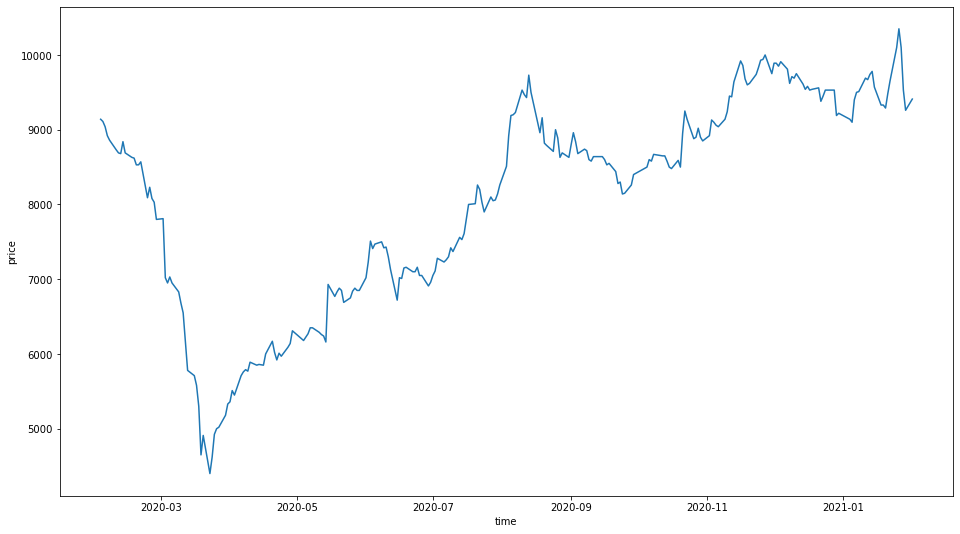

In [8]:
plt.figure(figsize=(16,9))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
scaled = scaler.fit_transform(stock[scale_cols])
scaled

array([[0.82537068, 0.80536913, 0.81293706, 0.79663866, 0.03296981],
       [0.77594728, 0.75671141, 0.81118881, 0.79159664, 0.0083776 ],
       [0.78583196, 0.76510067, 0.80769231, 0.77983193, 0.01111828],
       ...,
       [0.90280066, 0.88422819, 0.88811189, 0.86218487, 0.06950447],
       [0.84349259, 0.83221477, 0.83391608, 0.81680672, 0.04761135],
       [0.78583196, 0.81208054, 0.82517483, 0.84201681, 0.0232726 ]])

In [11]:
df = pd.DataFrame(scaled, columns=scale_cols)

In [12]:
# Train과 Test를 분할합니다

from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close',1), df['Close'], test_size=0.2, random_state=0, shuffle=False)

In [14]:
x_train.shape, y_train.shape

((199, 4), (199,))

In [15]:
x_test.shape, y_test.shape

((50, 4), (50,))

In [16]:
x_train

,Open,High,Low,Volume
0,0.825371,0.805369,0.812937,0.032970
1,0.775947,0.756711,0.811189,0.008378
2,0.785832,0.765101,0.807692,0.011118
3,0.775947,0.755034,0.765734,0.030576
4,0.742998,0.721477,0.763986,0.014993
...,...,...,...,...
194,0.828666,0.813758,0.854895,0.033070
195,0.818781,0.842282,0.863636,0.037558
196,0.874794,0.932886,0.902098,0.192327
197,0.912685,0.916107,0.937063,0.042562


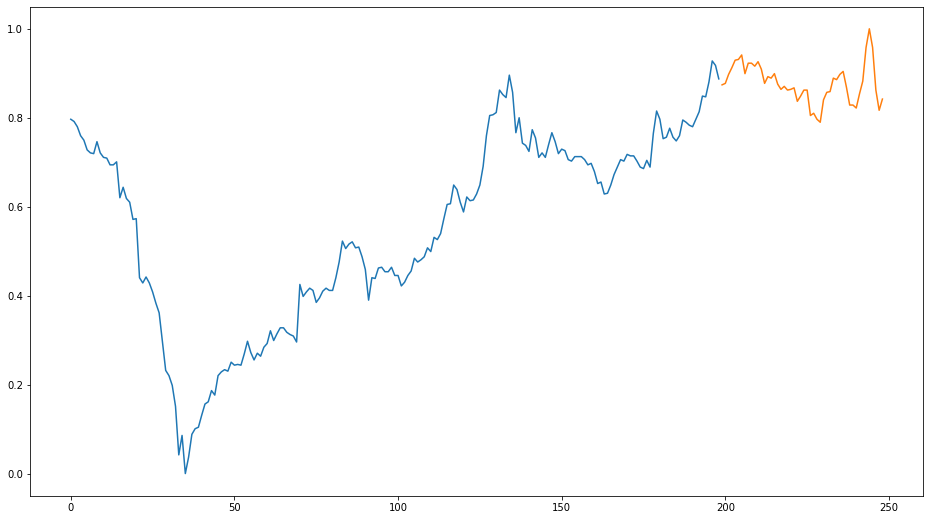

In [17]:
plt.figure(figsize=(16,9))
plt.plot(y_train)
plt.plot(y_test)

In [18]:
import tensorflow as tf

In [19]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [20]:
WINDOW_SIZE = 20
BATCH_SIZE = 32

In [21]:
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `

In [22]:
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber, binary_crossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential([
    Conv1D(filters=32, kernel_size=5,
          padding="causal",
          activation="relu",
          input_shape=[WINDOW_SIZE, 1]),
    
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [24]:
# loss에는 Huber(), optimizer에는 Adam(), metrics에는 mse를 사용합니다

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [25]:
# 10번 epoch 동안 val_loss 기준 개선이 없으면 끝나게 설정하였습니다

earlystopping = EarlyStopping(monitor='val_loss', patience=10)
filename = os.path.join('tmp', 'checkpointer.ckpt')
checkpoint = ModelCheckpoint(filename,
                            save_weights_only=True,
                            save_best_only=True,
                            monitor='val_loss',
                            verbose=1)

In [26]:
history = model.fit(train_data,
                   validation_data=(test_data),
                   epochs=50,
                   callbacks=[checkpoint, earlystopping])

Epoch 1/50
6/6 [==============================] - 4s 401ms/step - loss: 0.3193 - mae: 0.5170 - val_loss: 0.4000 - val_mae: 0.6307

Epoch 00001: val_loss improved from inf to 0.40000, saving model to tmp\checkpointer.ckpt
Epoch 2/50
6/6 [==============================] - 0s 16ms/step - loss: 0.1473 - mae: 0.3403 - val_loss: 0.0974 - val_mae: 0.3081

Epoch 00002: val_loss improved from 0.40000 to 0.09742, saving model to tmp\checkpointer.ckpt
Epoch 3/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0266 - mae: 0.1338 - val_loss: 0.0173 - val_mae: 0.1214

Epoch 00003: val_loss improved from 0.09742 to 0.01729, saving model to tmp\checkpointer.ckpt
Epoch 4/50
6/6 [==============================] - 0s 17ms/step - loss: 0.0146 - mae: 0.0887 - val_loss: 0.0092 - val_mae: 0.0812

Epoch 00004: val_loss improved from 0.01729 to 0.00917, saving model to tmp\checkpointer.ckpt
Epoch 5/50
6/6 [==============================] - 0s 17ms/step - loss: 0.0127 - mae: 0.0808 - val_loss: 0.0

In [27]:
model.load_weights(filename)

In [28]:
# test_data를 활용하여 예측을 진행했습니다

pred = model.predict(test_data)

In [29]:
pred.shape

(30, 1)

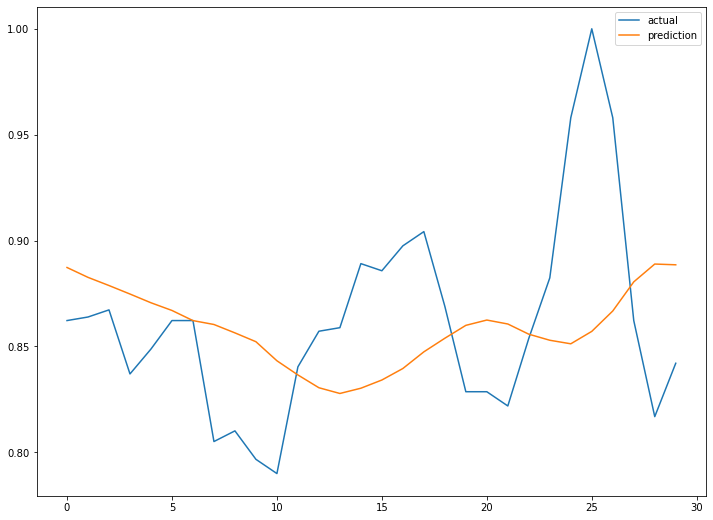

In [30]:
# 예측 데이터는 20일치 데이터로 21일치를 예측합니다. 
# test_data로 예측할 때 앞에 20일은 예측하지 않습니다 

plt.figure(figsize=(12,9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

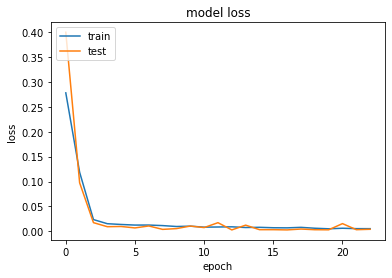

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


KeyError: 'accuracy'

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print(history.history.keys())
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()
 
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
 
smooth_mae_history = smooth_curve(average_mae_history[10:])
 
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()